# Fetching Tweets using Tweepy

In [2]:
!pip install tweepy
!pip install wordcloud
!pip install textblob
!pip install nltk
import nltk
nltk.download('all')
import tweepy

# Variables that contains the credentials to access Twitter API
ACCESS_TOKEN =#replace with your key 
ACCESS_SECRET =#replace with your key
CONSUMER_KEY =#replace with your key
CONSUMER_SECRET =#replace with your key

# Setup access to API
def connect_to_twitter_OAuth():
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    api = tweepy.API(auth)
    return api

# Create API object
api = connect_to_twitter_OAuth()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [3]:
# tweets from a specific user
trump_tweets = api.user_timeline('@realDonaldTrump',count=200, page=10)
for tweet in trump_tweets:
    print(tweet.text)

status = trump_tweets[0]
status._json.keys()

THANK YOU FLORIDA! #KAG2020 https://t.co/mNB4KMEj9u
“OMB Official: Ukraine Aid Held Up Because Other Countries Weren't Giving” https://t.co/nYwMq3M5SB
https://t.co/1EYKod0tee
RT @WhiteHouse: LIVE: President @realDonaldTrump Pardons the National Thanksgiving Turkey https://t.co/UjbVbghSiS
...love to have Mike Pompeo, Rick Perry, Mick Mulvaney and many others testify about the phony Impeachment Hoax. It… https://t.co/PQorUuinkw
...lawyer has already stated that I did nothing wrong. John Bolton is a patriot and may know that I held back the m… https://t.co/XCVTR2Od2l
The D.C. Wolves and Fake News Media are reading far too much into people being forced by Courts to testify before C… https://t.co/8LsXGDsTbH
RT @DailyCaller: President @realDonaldTrump signs the Women’s Suffrage Centennial Commemorative Coin Act which will direct the U.S. Treasur…
RT @DailyCaller: Adam Schiff Challenger Jennifer Barbosa Attacks Him For Chasing Impeachment While Allegedly Ignoring Homeless People In Ca…
RT @Da

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])

In [0]:
import pandas as pd
# fuction to extract data from tweet object
def extract_tweet_attributes(tweet_object):
    # create empty list
    tweet_list =[]
    # loop through tweet objects
    for tweet in tweet_object:
        tweet_id = tweet.id # unique integer identifier for tweet
        text = tweet.text # utf-8 text of tweet
        favorite_count = tweet.favorite_count
        retweet_count = tweet.retweet_count
        tweet_location = tweet.user.location #location of the user's tweet
        tweet_coordinates = tweet.coordinates #Geo coordinates of tweet where available
        created_at = tweet.created_at # utc time tweet created
        source = tweet.source # utility used to post tweet
        reply_to_status = tweet.in_reply_to_status_id # if reply int of orginal tweet id
        reply_to_user = tweet.in_reply_to_screen_name # if reply original tweetes screenname
        retweets = tweet.retweet_count # number of times this tweet retweeted
        favorites = tweet.favorite_count # number of time this tweet liked
        # append attributes to list
        tweet_list.append({'tweet_id':tweet_id, 
                          'text':text, 
                          'tweet_location':tweet_location, 
                          'tweet_coordinates':tweet_coordinates, 
                          'favorite_count':favorite_count,
                          'retweet_count':retweet_count,
                          'created_at':created_at, 
                          'source':source, 
                          'reply_to_status':reply_to_status, 
                          'reply_to_user':reply_to_user,
                          'retweets':retweets,
                          'favorites':favorites})
    # create dataframe   
    df = pd.DataFrame(tweet_list, columns=['tweet_id',
                                           'text',
                                           'tweet_location',
                                           'tweet_coordinates',
                                           'favorite_count',
                                           'retweet_count',
                                           'created_at',
                                           'source',
                                           'reply_to_status',
                                           'reply_to_user',
                                           'retweets',
                                           'favorites'])
    return df


df = extract_tweet_attributes(trump_tweets)

In [5]:
df

,tweet_id,text,tweet_location,tweet_coordinates,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites
0,1199525639046471681,THANK YOU FLORIDA! #KAG2020 https://t.co/mNB4K...,"Washington, DC",None,90171,20381,2019-11-27 03:09:33,Twitter for iPhone,NaN,None,20381,90171
1,1199520955753734144,“OMB Official: Ukraine Aid Held Up Because Oth...,"Washington, DC",None,59048,17810,2019-11-27 02:50:56,Twitter for iPhone,NaN,None,17810,59048
2,1199439757400395776,https://t.co/1EYKod0tee,"Washington, DC",None,77269,17967,2019-11-26 21:28:17,Twitter for iPhone,NaN,None,17967,77269
3,1199418046579970048,RT @WhiteHouse: LIVE: President @realDonaldTru...,"Washington, DC",None,0,10011,2019-11-26 20:02:01,Twitter for iPhone,NaN,None,10011,0
4,1199352977934487553,"...love to have Mike Pompeo, Rick Perry, Mick ...","Washington, DC",None,67434,16351,2019-11-26 15:43:27,Twitter for iPhone,1.199353e+18,realDonaldTrump,16351,67434
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1197128156341248001,Read the transcripts! https://t.co/gQxYzjWehV,"Washington, DC",None,43546,11977,2019-11-20 12:22:48,Twitter for iPhone,NaN,None,11977,43546
196,1197127753180622848,"RT @dcexaminer: Rep. @EliseStefanik: ""No Quid ...","Washington, DC",None,0,11964,2019-11-20 12:21:12,Twitter for iPhone,NaN,None,11964,0
197,1197014949341646848,Thank you Tennessee! https://t.co/MYP1FaJhUx,"Washington, DC",None,60821,16053,2019-11-20 04:52:58,Twitter for iPhone,NaN,None,16053,60821
198,1196977794183499776,Congressman Van Drew (D-NJ): We’ve spent milli...,"Washington, DC",None,80649,19651,2019-11-20 02:25:19,Twitter for iPhone,NaN,None,19651,80649


### Word Cloud of tweets

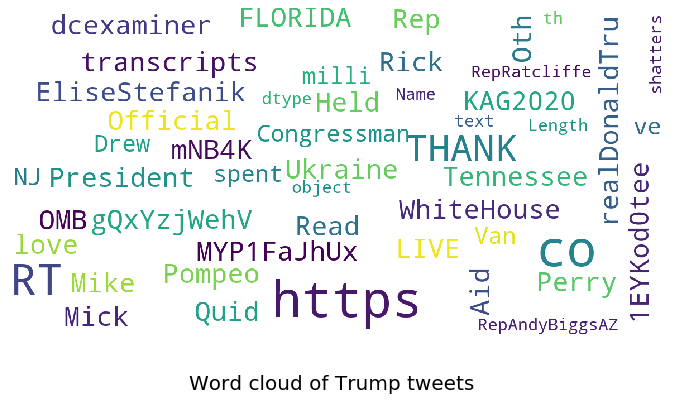

In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df['text'], 'Word cloud of Trump tweets')

### Add columns of User handles and Hashtags

In [7]:
import re
def find_twitterhandles(strtweet):
    x = re.findall(r"@(\w+)", strtweet)
    x = ''.join(x)
    return x 

def find_hashtags(strtweet):
    y = re.findall(r"#(\w+)", strtweet)
    y = ''.join(y)
    return y

df['twitterhandles'] = df['text'].apply(lambda x:find_twitterhandles(x))
df['hashtags'] = df['text'].apply(lambda x:find_hashtags(x))
df.head(200)

,tweet_id,text,tweet_location,tweet_coordinates,favorite_count,retweet_count,created_at,source,reply_to_status,reply_to_user,retweets,favorites,twitterhandles,hashtags
0,1199525639046471681,THANK YOU FLORIDA! #KAG2020 https://t.co/mNB4K...,"Washington, DC",None,90171,20381,2019-11-27 03:09:33,Twitter for iPhone,NaN,None,20381,90171,,KAG2020
1,1199520955753734144,“OMB Official: Ukraine Aid Held Up Because Oth...,"Washington, DC",None,59048,17810,2019-11-27 02:50:56,Twitter for iPhone,NaN,None,17810,59048,,
2,1199439757400395776,https://t.co/1EYKod0tee,"Washington, DC",None,77269,17967,2019-11-26 21:28:17,Twitter for iPhone,NaN,None,17967,77269,,
3,1199418046579970048,RT @WhiteHouse: LIVE: President @realDonaldTru...,"Washington, DC",None,0,10011,2019-11-26 20:02:01,Twitter for iPhone,NaN,None,10011,0,WhiteHouserealDonaldTrump,
4,1199352977934487553,"...love to have Mike Pompeo, Rick Perry, Mick ...","Washington, DC",None,67434,16351,2019-11-26 15:43:27,Twitter for iPhone,1.199353e+18,realDonaldTrump,16351,67434,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1197128156341248001,Read the transcripts! https://t.co/gQxYzjWehV,"Washington, DC",None,43546,11977,2019-11-20 12:22:48,Twitter for iPhone,NaN,None,11977,43546,,
196,1197127753180622848,"RT @dcexaminer: Rep. @EliseStefanik: ""No Quid ...","Washington, DC",None,0,11964,2019-11-20 12:21:12,Twitter for iPhone,NaN,None,11964,0,dcexaminerEliseStefanik,
197,1197014949341646848,Thank you Tennessee! https://t.co/MYP1FaJhUx,"Washington, DC",None,60821,16053,2019-11-20 04:52:58,Twitter for iPhone,NaN,None,16053,60821,,
198,1196977794183499776,Congressman Van Drew (D-NJ): We’ve spent milli...,"Washington, DC",None,80649,19651,2019-11-20 02:25:19,Twitter for iPhone,NaN,None,19651,80649,,


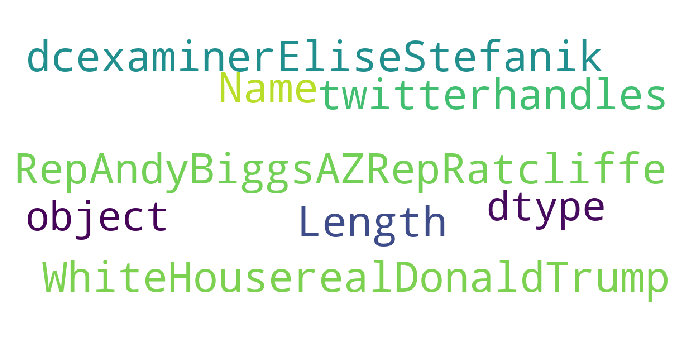

In [8]:
show_wordcloud(df['twitterhandles'])

In [9]:
df['twitterhandles'].value_counts()

                              86
realDonaldTrump                6
RepMarkMeadows                 4
WhiteHouserealDonaldTrump      4
BuckSexton                     4
                              ..
GOPLeaderJim_Jordan            1
parscale                       1
HeatherChildersPMorici1        1
DailyCallerrealDonaldTrump     1
GeraldoRiveraevanperez         1
Name: twitterhandles, Length: 83, dtype: int64

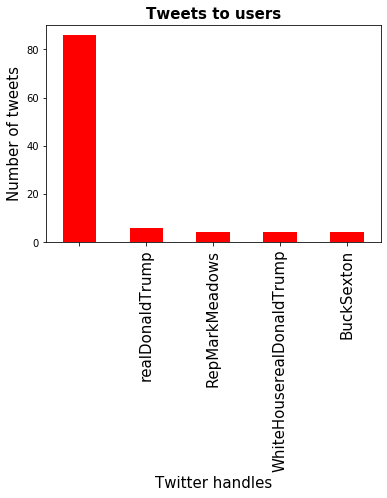

In [10]:
import matplotlib.pyplot as plt

tweets_by_lang = df['twitterhandles'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Twitter handles', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Tweets to users', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

# Removing user handle 

In [11]:
# removing user handle 
df['tidy_tweet'] = df['text'].replace(to_replace ='(@[\w]+)', value ='', regex = True)
df['tidy_tweet'] = df['tidy_tweet'].replace(to_replace =('RT'), value ='',regex = True) 
df['tidy_tweet']

0      THANK YOU FLORIDA! #KAG2020 https://t.co/mNB4K...
1      “OMB Official: Ukraine Aid Held Up Because Oth...
2                                https://t.co/1EYKod0tee
3       : LIVE: President  Pardons the National Thank...
4      ...love to have Mike Pompeo, Rick Perry, Mick ...
                             ...                        
195        Read the transcripts! https://t.co/gQxYzjWehV
196     : Rep. : "No Quid Pro Quo?"\n\nMorrison: "Cor...
197         Thank you Tennessee! https://t.co/MYP1FaJhUx
198    Congressman Van Drew (D-NJ): We’ve spent milli...
199     : . shatters the myths created by the "whistl...
Name: tidy_tweet, Length: 200, dtype: object

# Remove any links from the tweet

In [12]:
#remove any links from the tweet: Links not required for performing sentiment analysis.
df['tidy_tweet'] = df['tidy_tweet'].str.replace('((www\.[\s]+)|(https?://[^\s]+))','\0',regex=True)
df['tidy_tweet']

0                          THANK YOU FLORIDA! #KAG2020  
1      “OMB Official: Ukraine Aid Held Up Because Oth...
2                                                       
3       : LIVE: President  Pardons the National Thank...
4      ...love to have Mike Pompeo, Rick Perry, Mick ...
                             ...                        
195                              Read the transcripts!  
196     : Rep. : "No Quid Pro Quo?"\n\nMorrison: "Cor...
197                               Thank you Tennessee!  
198    Congressman Van Drew (D-NJ): We’ve spent milli...
199     : . shatters the myths created by the "whistl...
Name: tidy_tweet, Length: 200, dtype: object

# Remove special characters, numbers, punctuations:

In [0]:
# remove special characters, numbers, punctuations: None of them would add any value to the sentiment score.
df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z]+", " ")

In [14]:
df['tidy_tweet']

0                                 THANK YOU FLORIDA KAG 
1       OMB Official Ukraine Aid Held Up Because Othe...
2                                                       
3       LIVE President Pardons the National Thanksgiv...
4       love to have Mike Pompeo Rick Perry Mick Mulv...
                             ...                        
195                                Read the transcripts 
196     Rep No Quid Pro Quo Morrison Correct No Bribe...
197                                 Thank you Tennessee 
198    Congressman Van Drew D NJ We ve spent millions...
199     shatters the myths created by the whistleblow...
Name: tidy_tweet, Length: 200, dtype: object

# Tokenising and removing Stop Words

In [15]:
df["tidy_tweet"] = [i.lower() for i in df["tidy_tweet"]]
df["tidy_tweet"] = [i.split() for i in df["tidy_tweet"]]

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df['tidy_tweet']=df['tidy_tweet'].apply(lambda x: [item for item in x if item not in stop])
df['tidy_tweet']

0                                  [thank, florida, kag]
1      [omb, official, ukraine, aid, held, countries,...
2                                                     []
3      [live, president, pardons, national, thanksgiv...
4      [love, mike, pompeo, rick, perry, mick, mulvan...
                             ...                        
195                                  [read, transcripts]
196    [rep, quid, pro, quo, morrison, correct, bribe...
197                                   [thank, tennessee]
198    [congressman, van, drew, nj, spent, millions, ...
199    [shatters, myths, created, whistleblower, viol...
Name: tidy_tweet, Length: 200, dtype: object

In [17]:
#Alternate Method: Using TweetTokenizer to tokenize the tweet
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tt.tokenize(s0)

['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

In [0]:
def rejoin_words(row):
    my_list = row['tidy_tweet']
    joined_words = ( " ".join(my_list))
    return joined_words

df['tidy_tweet'] = df.apply(rejoin_words, axis=1)

In [19]:
df['tidy_tweet']

0                                      thank florida kag
1         omb official ukraine aid held countries giving
2                                                       
3      live president pardons national thanksgiving t...
4      love mike pompeo rick perry mick mulvaney many...
                             ...                        
195                                     read transcripts
196    rep quid pro quo morrison correct bribery corr...
197                                      thank tennessee
198    congressman van drew nj spent millions dollars...
199    shatters myths created whistleblower violation...
Name: tidy_tweet, Length: 200, dtype: object

# Applying Lemmatization

In [20]:
import nltk
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df['tidy_tweet'] = df['tidy_tweet'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
df['tidy_tweet']

0                                  [thank, florida, kag]
1      [omb, official, ukraine, aid, held, country, g...
2                                                     []
3      [live, president, pardon, national, thanksgivi...
4      [love, mike, pompeo, rick, perry, mick, mulvan...
                             ...                        
195                                   [read, transcript]
196    [rep, quid, pro, quo, morrison, correct, bribe...
197                                   [thank, tennessee]
198    [congressman, van, drew, nj, spent, million, d...
199    [shatters, myth, created, whistleblower, viola...
Name: tidy_tweet, Length: 200, dtype: object

In [0]:
def rejoin_words(row):
    my_list = row['tidy_tweet']
    joined_words = ( " ".join(my_list))
    return joined_words

df['tidy_tweet'] = df.apply(rejoin_words, axis=1)

In [23]:
df['tidy_tweet']

0                                      thank florida kag
1           omb official ukraine aid held country giving
2                                                       
3      live president pardon national thanksgiving tu...
4      love mike pompeo rick perry mick mulvaney many...
                             ...                        
195                                      read transcript
196    rep quid pro quo morrison correct bribery corr...
197                                      thank tennessee
198    congressman van drew nj spent million dollar o...
199    shatters myth created whistleblower violation ...
Name: tidy_tweet, Length: 200, dtype: object

In [24]:
df.isnull().sum()

tweet_id               0
text                   0
tweet_location         0
tweet_coordinates    200
favorite_count         0
retweet_count          0
created_at             0
source                 0
reply_to_status      184
reply_to_user        184
retweets               0
favorites              0
twitterhandles         0
hashtags               0
tidy_tweet             0
dtype: int64

# Check the Sentiment using TextBlob

In [25]:
#!pip install textblob
from textblob import TextBlob
df[['polarity', 'subjectivity']] = df['tidy_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
df[['text','polarity', 'subjectivity']]

,text,polarity,subjectivity
0,THANK YOU FLORIDA! #KAG2020 https://t.co/mNB4K...,0.000000,0.00
1,“OMB Official: Ukraine Aid Held Up Because Oth...,0.000000,0.00
2,https://t.co/1EYKod0tee,0.000000,0.00
3,RT @WhiteHouse: LIVE: President @realDonaldTru...,0.136364,0.50
4,"...love to have Mike Pompeo, Rick Perry, Mick ...",0.500000,0.55
...,...,...,...
195,Read the transcripts! https://t.co/gQxYzjWehV,0.000000,0.00
196,"RT @dcexaminer: Rep. @EliseStefanik: ""No Quid ...",0.000000,0.00
197,Thank you Tennessee! https://t.co/MYP1FaJhUx,0.000000,0.00
198,Congressman Van Drew (D-NJ): We’ve spent milli...,-0.100000,0.10


In [26]:
TextBlob('It was a worst movie i ever saw.').sentiment[0]

-1.0

In [27]:
TextBlob('They had a gret time in the jungl.').correct()

TextBlob("They had a great time in the jungle.")

In [28]:

TextBlob('The train to Bombay was 30 min late').noun_phrases

WordList(['bombay'])

In [29]:
df['text'][6]

'The D.C. Wolves and Fake News Media are reading far too much into people being forced by Courts to testify before C… https://t.co/8LsXGDsTbH'

In [0]:
def sent_word(polarity_score):
    if polarity_score>0:
        x = 'pos'
    elif polarity_score<0:
        x = 'neg'
    elif polarity_score==0:
        x = 'neutral'
    else:
        print('provide polarity score.')
    return x

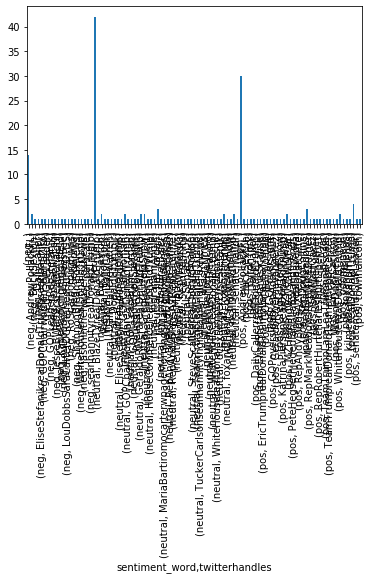

In [31]:
df['sentiment_word'] = df['polarity'].apply(lambda x: sent_word(x))
df.groupby(['sentiment_word','twitterhandles']).hashtags.count().plot.bar()


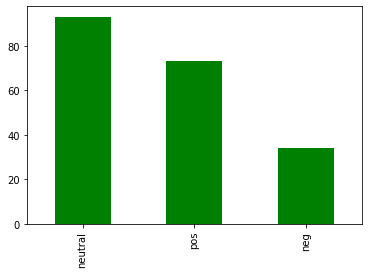

In [32]:
sent_score = df['sentiment_word'].value_counts()

fig, ax = plt.subplots()
sent_score.plot(ax=ax, kind='bar', color='green')

In [33]:
from textblob.sentiments import NaiveBayesAnalyzer
for tweet in df['tidy_tweet']:
    print(tweet)
    analysis = TextBlob(tweet,analyzer=NaiveBayesAnalyzer())
    print(analysis.sentiment)  

thank florida kag
Sentiment(classification='pos', p_pos=0.6584385763490237, p_neg=0.3415614236509764)
omb official ukraine aid held country giving
Sentiment(classification='pos', p_pos=0.7998019972487915, p_neg=0.20019800275121033)

Sentiment(classification='pos', p_pos=0.5, p_neg=0.5)
live president pardon national thanksgiving turkey
Sentiment(classification='neg', p_pos=0.17227116894344635, p_neg=0.8277288310565523)
love mike pompeo rick perry mick mulvaney many others testify phony impeachment hoax
Sentiment(classification='pos', p_pos=0.79568454874015, p_neg=0.20431545125985112)
lawyer already stated nothing wrong john bolton patriot may know held back
Sentiment(classification='pos', p_pos=0.8075451509781758, p_neg=0.19245484902182447)
c wolf fake news medium reading far much people forced court testify c
Sentiment(classification='pos', p_pos=0.967996211965142, p_neg=0.03200378803485851)
president sign woman suffrage centennial commemorative coin act direct u treasur
Sentiment(cla